<a href="https://colab.research.google.com/github/GoldenWanGila/Collage-Project/blob/master/%E9%A0%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from numpy.core import numeric
import seaborn as sns; sns.set()
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import sklearn.linear_model
import os
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression
from sympy import *
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from math import sqrt

rail = pd.read_csv("/content/drive/MyDrive/railway.csv")
rail = rail.dropna()
rail=rail.drop([22157])

rail.sort_values(by=["time","date"],inplace=True)
listlist = ["2021/02/10","2021/02/11","2021/02/12","2021/02/13","2021/02/14","2021/02/15","2021/02/16","2021/04/02","2021/04/03","2021/04/04","2021/04/05","2021/02/26","2021/02/27","2021/02/28","2021/03/01"]
railk = rail.drop([281214,320035,109189,42104,94652,28684,83423,11483,139626,318974,280053,41139,93877,27864,82233,9554,25464,38332,78755,91610,105023,108128,136664,160110,178243,194730,220481,237466,257552,276670,288466,302440,315877,240186,241119])
railk = railk.drop([318814,107967,279878,40993,93759,27742,82057,240045,304593,290288,223071,141101,12440,181219,164867,262504,198261])
railk = railk.drop([320279,109433,281484,42330,94830,28875,83698,241333,305682,291195,224360,143317,13877,182701,167212,264864,199971,52135])
railholiday = railk[railk["date"].isin(listlist)]
rail = rail[rail["date"]>='2021/01/22']
rail = rail[rail["date"]!="2021/04/02"]
rail = rail[rail["date"]!="2021/04/03"]
rail = rail[rail["date"]!="2020/12/23"]
railk = rail.drop([281214,320035,109189,42104,94652,28684,83423,11483,139626,318974,280053,41139,93877,27864,82233,9554,25464,38332,78755,91610,105023,108128,136664,160110,178243,194730,220481,237466,257552,276670,288466,302440,315877,240186,241119])
railk = railk.drop([318814,107967,279878,40993,93759,27742,82057,240045,304593,290288,223071,141101,12440,181219,164867,262504,198261])
railk = railk.drop([320279,109433,281484,42330,94830,28875,83698,241333,305682,291195,224360,143317,13877,182701,167212,264864,199971,52135])
#縱南(彰化以南)
listh = [112,182,184,108,114,116,118,172,122,176,372,128,178,134,138,142,144,146,150,152,374]
listj1 = [182,184,108,114,116,118,172,122,176,128,178,134,138,142,144,150,152,374]

#山線(彰化-竹南)
list = [106,104,102,170,182,184,108,114,116,118,172,122,176,128,178,134,138,142,144,150,152]
#苗栗到竹南
listm = [272,104,102,170,184,108,114,116,118,172,122,176,134,142,144,150,152]
#竹南到新竹
listz = [112,126,140,160,146,272,104,102,170,184,108,114,116,118,172,122,176,134,142,144,150,152]
#縱北(新竹、中壢、桃園、板橋)
listn= [112,126,140,160,146,272,106,104,102,170,182,184,108,114,116,118,172,122,176,128,178,134,138,142,144,150,152]

railhk = railk[railk["num"].isin(listh)]
railj1 = railk[railk["num"].isin(listj1)]
railhok = railholiday[railholiday["num"].isin(listh)]
railho = railholiday[railholiday["num"].isin(listj1)]
railhot = railholiday[railholiday["num"].isin(list)]
railhon = railholiday[railholiday["num"].isin(listn)]
railh = rail[rail["num"].isin(listh)]
rail = rail[rail["num"].isin(list)]
railm = rail[rail["num"].isin(listm)]
railz = rail[rail["num"].isin(listz)]
railn = rail[rail["num"].isin(listn)]
#早6-9、晚5-8
#170(斗南大林),184,108,116,122,134,142,150(斗南)
#102,104(員),170,106(員),182,184,108,114,116,118,172,122,176,372(中豐),128,178,134,138,142,144,168(中豐),152,374(豐)
#丟:22157
#海線112,126,140,160,146
#沒停竹南106,182,128,178,138
#rail=rail.drop([28684,42104,83423,94652,109189,241119,281214,320035,225222])
#rail=rail.drop([9554,25464,38332,78755,91610,105023,136664,160110,178243,194730,220481,237466 ,257552 ,276670,288466,302440,315877) 
new_ticks = np.linspace(0,49,50)
label_map = {'Keelung':1,'Xizhi':2,'Taipei':3,'Banqiao':4,'Taoyuan':5,'Zhongli':6,'Hsinchu':7,'Zhunan':8,'Miaoli':9,'Fengyuan':10,'Taichung':11,'Changhua':12,'Yuanlin':13,
'Douliu':14,'Chiayi':15,'Tainan':16,'Xinzuoying':17,'Kaohsiung':18,'Tanzi':0,'Taiyuan':0,'Xinwuri':0}




In [ ]:
railkhho = railhok[railhok["Station"]=='Kaohsiung']
railtnhok = railhok[railhok["Station"]=='Tainan']
railtnho = railho[railho["Station"]=='Tainan']
railcyho = railho[railho["Station"]=='Chiayi']
rail33ho = railho[railho["Station"]=='Taichung']
rail33hot = railhot[railhot["Station"]=='Taichung']
rail72hot = railhot[railhot["Station"]=='Hsinchu']
rail72hon = railhon[railhon["Station"]=='Hsinchu']
rail99hon = railhon[railhon["Station"]=='Banqiao']

railkhk = railhk[railhk["Station"]=='Kaohsiung']
railxzyk = railhk[railhk["Station"]=='Xinzuoying']
railtnk = railhk[railhk["Station"]=='Tainan']
railcyk = railhk[railhk["Station"]=='Chiayi']
rail0k = railhk[railhk["Station"]=='Douliu']
rail1k = railhk[railhk["Station"]=='Yuanlin']
rail2k = railhk[railhk["Station"]=='Changhua']

railtnj = railj1[railj1["Station"]=='Tainan']
railcyj = railj1[railj1["Station"]=='Chiayi']
rail33 = railj1[railj1["Station"]=='Taichung']


railkh = railh[railh["Station"]=='Kaohsiung']
railxzy = railh[railh["Station"]=='Xinzuoying']
railtn = railh[railh["Station"]=='Tainan']
railcy = railh[railh["Station"]=='Chiayi']
rail0 = railh[railh["Station"]=='Douliu']
rail1 = railh[railh["Station"]=='Yuanlin']
rail2 = railh[railh["Station"]=='Changhua']
rail22 = rail[rail["Station"]=='Changhua']
rail3 = rail[rail["Station"]=='Taichung']
rail4 = rail[rail["Station"]=='Fengyuan']
rail4m = railm[railm["Station"]=='Fengyuan']
rail4p = rail4.drop([300927,300999,301141,301211,301281,301351])
rail5 = rail[rail["Station"]=='Miaoli']
rail55 = railm[railm["Station"]=='Miaoli']
rail66 = railm[railm["Station"]=='Zhunan']
rail6 = railz[railz["Station"]=='Zhunan']
rail77 = railz[railz["Station"]=='Hsinchu']
rail7 = railn[railn["Station"]=='Hsinchu']
rail72 = rail[rail["Station"]=='Hsinchu']
rail81 = railn[railn["Station"]=='Zhongli']
rail8 = railn[railn["Station"]=='Taoyuan']
rail88 = rail8.drop([176288,176681])
rail9 = railn[railn["Station"]=='Banqiao']

**3/27加祿-枋野 電力故障>>影響374車次>>高雄到台中站改railk**
https://www.ptt.cc/bbs/Railway/M.1616831786.A.952.html 

 **3/5中壢死傷事故https://www.ptt.cc/bbs/Railway/M.1614910195.A.09E.html
中壢以北略有調整** 

 **2/12 152車次自強號民雄頭橋急停**
https://www.ptt.cc/bbs/Railway/M.1613134577.A.A67.html

**3/15 114次機車故障** https://www.ptt.cc/bbs/Railway/M.1615770150.A.E96.html

**高雄到台南(原)**

Modelkt slope:     0.9322192229969003
Modelkt intercept: 0.8941847137906922
LinearRegression Score:  0.7938212275721055


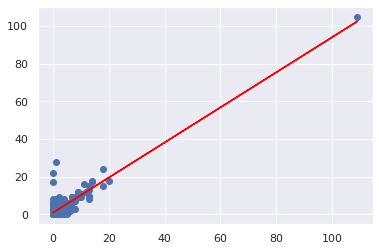

{xkt: 13.1923054489298, ykt: 13.1923054489298}
算出允許誤差
xgboost、lasso比較
[13:49:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.8092856195031736


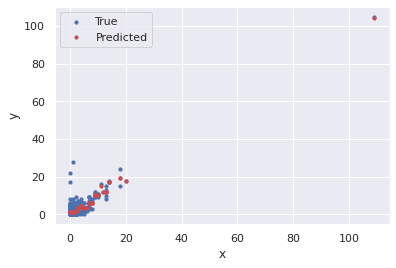

1.5907755876671041


In [ ]:
xkt= railkh["delay"].to_numpy()
ykt= railtn["delay"].to_numpy()
xkt=xkt.reshape(-1,1)
modelkt = LinearRegression(fit_intercept=True)
modelkt.fit(xkt, ykt)
print("Modelkt slope:    ", modelkt.coef_[0])
print("Modelkt intercept:", modelkt.intercept_)
print("LinearRegression Score: ",modelkt.score(xkt,ykt))
predict = modelkt.predict(xkt)
plt.plot(xkt,predict,c="red")
plt.scatter(xkt,ykt)
plt.show()
k= modelkt.coef_[0]
l= modelkt.intercept_
x,y = symbols('xkt,ykt')
print(solve([k*x+l-y,x-y],[x,y]))
print("算出允許誤差")
print("xgboost、lasso比較")
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(xkt,ykt)
predicted=xgbrModel.predict(xkt)
print("xg Score: ",xgbrModel.score(xkt,ykt))
plt.scatter(xkt, ykt, s=10, label='True')
plt.scatter(xkt, predicted, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
v = mean_squared_error(ykt,predicted)
print(sqrt(v))


**高雄到台南(調整後)**

Modelkt slope:     0.8702488747496983
Modelkt intercept: 0.8947205613758504
LinearRegression Score:  0.5696717511109959


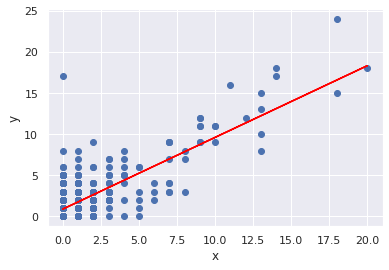

{xkt: 6.89566706762543, ykt: 6.89566706762543}
算出允許誤差
xgboost、lasso比較
[13:49:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.6158255128045063


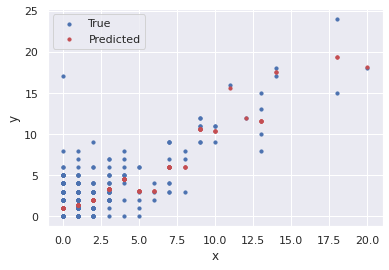

1.2916543134027354


In [ ]:

xkt= railkhk["delay"].to_numpy()
ykt= railtnk["delay"].to_numpy()
xkt=xkt.reshape(-1,1)
modelkt = LinearRegression(fit_intercept=True)
modelkt.fit(xkt, ykt)
print("Modelkt slope:    ", modelkt.coef_[0])
print("Modelkt intercept:", modelkt.intercept_)
print("LinearRegression Score: ",modelkt.score(xkt,ykt))
predict = modelkt.predict(xkt)
plt.plot(xkt,predict,c="red")
plt.scatter(xkt,ykt)
plt.xlabel('x')
plt.ylabel('y')
plt.show()
k= modelkt.coef_[0]
l= modelkt.intercept_
x,y = symbols('xkt,ykt')
print(solve([k*x+l-y,x-y],[x,y]))
print("算出允許誤差")
print("xgboost、lasso比較")
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(xkt,ykt)
predicted=xgbrModel.predict(xkt)
print("xg Score: ",xgbrModel.score(xkt,ykt))
plt.scatter(xkt, ykt, s=10, label='True')
plt.scatter(xkt, predicted, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
v = mean_squared_error(ykt,predicted)
print(sqrt(v))


**高雄到新左營跟新左營到台南分別調整0.5分**
**人本來就多不調也行**

**高雄台南連假**

modelkth slope:     0.93744027379603
modelkth intercept: 0.6315032113252004
LinearRegression Score:  0.7991250657652967


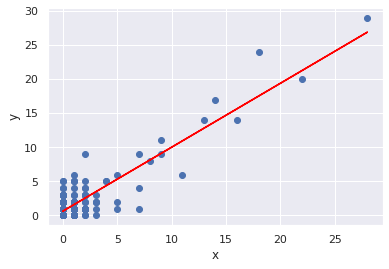

{xkth: 10.0944049733569, ykth: 10.0944049733569}
算出允許誤差
xgboost、lasso比較
[13:49:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.8546481940260929


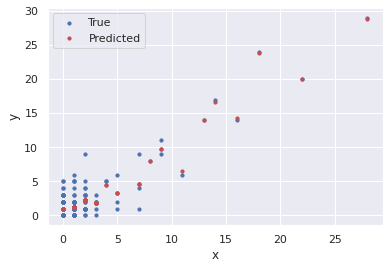

1.2471805066020687


In [ ]:
xkth= railkhho["delay"].to_numpy()
ykth= railtnhok["delay"].to_numpy()
xkth=xkth.reshape(-1,1)
modelkth = LinearRegression(fit_intercept=True)
modelkth.fit(xkth, ykth)
print("modelkth slope:    ", modelkth.coef_[0])
print("modelkth intercept:", modelkth.intercept_)
print("LinearRegression Score: ",modelkth.score(xkth,ykth))
predict = modelkth.predict(xkth)
plt.plot(xkth,predict,c="red")
plt.scatter(xkth,ykth)
plt.xlabel('x')
plt.ylabel('y')
plt.show()
k= modelkth.coef_[0]
l= modelkth.intercept_
x,y = symbols('xkth,ykth')
print(solve([k*x+l-y,x-y],[x,y]))
print("算出允許誤差")
print("xgboost、lasso比較")
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(xkth,ykth)
predicted=xgbrModel.predict(xkth)
print("xg Score: ",xgbrModel.score(xkth,ykth))
plt.scatter(xkth, ykth, s=10, label='True')
plt.scatter(xkth, predicted, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
v = mean_squared_error(ykth,predicted)
print(sqrt(v))


**高雄到新左營**

Modelkx slope:     0.8699163144577493
Modelkx intercept: 0.31721641756903796


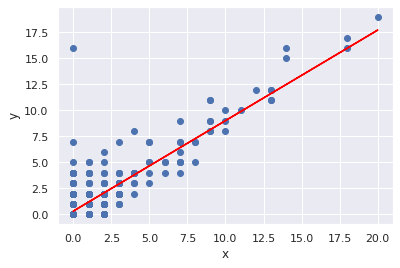

{xkx: 2.43855650496623, ykx: 2.43855650496623}
算出允許誤差
xgboost、lasso比較
[13:49:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.7650504531605239


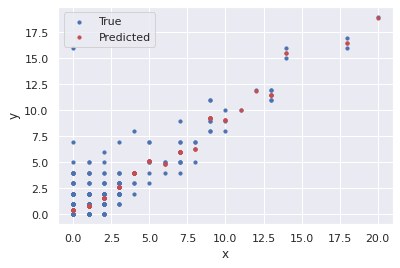

0.8844881636290305


In [ ]:
xkx= railkhk["delay"].to_numpy()
ykx= railxzyk["delay"].to_numpy()
xkx=xkx.reshape(-1,1)
modelkx = LinearRegression(fit_intercept=True)
modelkx.fit(xkx, ykx)
print("Modelkx slope:    ", modelkx.coef_[0])
print("Modelkx intercept:", modelkx.intercept_)
predict = modelkx.predict(xkx)
plt.plot(xkx,predict,c="red")
plt.scatter(xkx,ykx)
plt.xlabel('x')
plt.ylabel('y')
plt.show()
k= modelkx.coef_[0]
l= modelkx.intercept_
x,y = symbols('xkx,ykx')
print(solve([k*x+l-y,x-y],[x,y]))
print("算出允許誤差")
print("xgboost、lasso比較")
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(xkx,ykx)
predicted=xgbrModel.predict(xkx)
print("xg Score: ",xgbrModel.score(xkx,ykx))
plt.scatter(xkx, ykx, s=10, label='True')
plt.scatter(xkx, predicted, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
v = mean_squared_error(ykx,predicted)
print(sqrt(v))



**新左營到台南**

Modelxt slope:     0.9492675567155879
Modelxt intercept: 0.6211733592959708


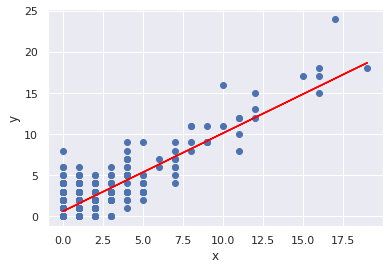

{xxt: 12.2441049372213, yxt: 12.2441049372213}
算出允許誤差
xgboost、lasso比較
[13:49:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.7353627871115452


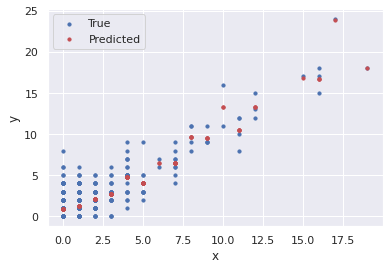

1.0720313737190426
          Station  direction  id        date   time  num      dest  delay type
319714  Kaohsiung          1  48  2021/03/24  14:37  134   Keelung   18.0    B
317217  Kaohsiung          1  62  2021/02/26  16:57  144   Keelung   18.0    B
314459  Kaohsiung          1  79  2021/01/28  19:28  374  Taichung   20.0    B
           Station  direction  id        date   time  num      dest  delay type
107666  Xinzuoying          1   4  2021/03/12  06:10  108      Qidu   16.0    B
104502  Xinzuoying          1  43  2021/02/07  13:47  178   Hualien   16.0    B
108868  Xinzuoying          1  48  2021/03/24  14:47  134   Keelung   16.0    B
106367  Xinzuoying          1  62  2021/02/26  17:07  144   Keelung   17.0    B
103596  Xinzuoying          1  79  2021/01/28  19:40  374  Taichung   19.0    B
       Station  direction  id        date   time  num      dest  delay type
279549  Tainan          1   4  2021/03/12  06:40  108      Qidu   18.0    B
276106  Tainan          1  49  20

In [ ]:
xxt= railxzyk["delay"].to_numpy()
yxt= railtnk["delay"].to_numpy()
xxt=xxt.reshape(-1,1)
modelxt = LinearRegression(fit_intercept=True)
modelxt.fit(xxt, yxt)
print("Modelxt slope:    ", modelxt.coef_[0])
print("Modelxt intercept:", modelxt.intercept_)
predict = modelxt.predict(xxt)
plt.plot(xxt,predict,c="red")
plt.scatter(xxt,yxt)
plt.xlabel('x')
plt.ylabel('y')
plt.show()
k= modelxt.coef_[0]
l= modelxt.intercept_
x,y = symbols('xxt,yxt')
print(solve([k*x+l-y,x-y],[x,y]))
print("算出允許誤差")
print("xgboost、lasso比較")
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(xxt,yxt)
predicted=xgbrModel.predict(xxt)
print("xg Score: ",xgbrModel.score(xxt,yxt))
plt.scatter(xxt, yxt, s=10, label='True')
plt.scatter(xxt, predicted, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
v = mean_squared_error(yxt,predicted)
print(sqrt(v))

print(railkhk[railkhk["delay"]>15])
print(railxzyk[railxzyk["delay"]>15])
print(railtnk[railtnk["delay"]>15])

**台南到嘉義**

Modeltc slope:     0.8661210741973825
Modeltc intercept: 0.19355491100724231


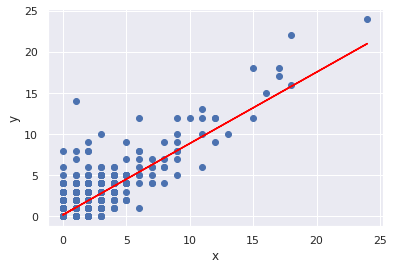

{xtc: 1.44574592189816, ytc: 1.44574592189816}
算出允許誤差
xgboost、lasso比較
[13:49:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.7039678488290241


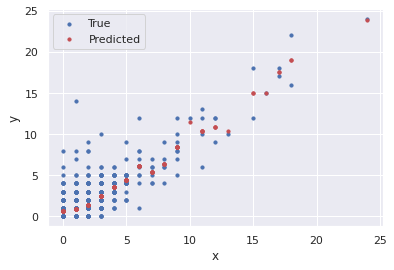

1.2017079425590345


In [ ]:
xtc= railtnk["delay"].to_numpy()
ytc= railcyk["delay"].to_numpy()
xtc=xtc.reshape(-1,1)
modeltc = LinearRegression(fit_intercept=True)
modeltc.fit(xtc, ytc)
print("Modeltc slope:    ", modeltc.coef_[0])
print("Modeltc intercept:", modeltc.intercept_)
predict = modeltc.predict(xtc)
plt.plot(xtc,predict,c="red")
plt.scatter(xtc,ytc)
plt.xlabel('x')
plt.ylabel('y')
plt.show()
k= modeltc.coef_[0]
l= modeltc.intercept_
x,y = symbols('xtc,ytc')
print(solve([k*x+l-y,x-y],[x,y]))
print("算出允許誤差")
print("xgboost、lasso比較")
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(xtc,ytc)
predicted=xgbrModel.predict(xtc)
print("xg Score: ",xgbrModel.score(xtc,ytc))
plt.scatter(xtc, ytc, s=10, label='True')
plt.scatter(xtc, predicted, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
v = mean_squared_error(ytc,predicted)
print(sqrt(v))

**台南到台中**

Modelcd slope:     0.8448887827715686
Modelcd intercept: 0.50400540080009


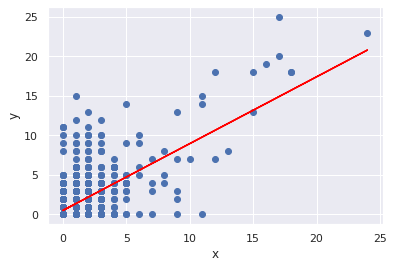

{xtt: 3.24931626355459, yt3: 3.24931626355459}
算出允許誤差
xgboost、lasso比較
[13:49:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.4418182169308269


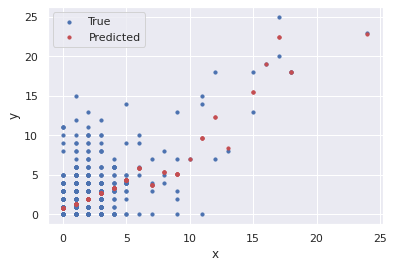

2.0981651863157142


In [ ]:
xtt= railtnj["delay"].to_numpy()
yt3= rail33["delay"].to_numpy()
xtt=xtt.reshape(-1,1)
modelcd = LinearRegression(fit_intercept=True)
modelcd.fit(xtt, yt3)
print("Modelcd slope:    ", modelcd.coef_[0])
print("Modelcd intercept:", modelcd.intercept_)
predict = modelcd.predict(xtt)
plt.plot(xtt,predict,c="red")
plt.scatter(xtt,yt3)
plt.xlabel('x')
plt.ylabel('y')
plt.show()
k= modelcd.coef_[0]
l= modelcd.intercept_
x,y = symbols('xtt,yt3')
print(solve([k*x+l-y,x-y],[x,y]))
print("算出允許誤差")
print("xgboost、lasso比較")
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(xtt,yt3)
predicted=xgbrModel.predict(xtt)
print("xg Score: ",xgbrModel.score(xtt,yt3))
plt.scatter(xtt, yt3, s=10, label='True')
plt.scatter(xtt, predicted, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
v = mean_squared_error(yt3,predicted)
print(sqrt(v))

**台南台中連假**

modelt3h slope:     0.9715103493427786
modelt3h intercept: 0.7327704007117803
LinearRegression Score:  0.686505462750195


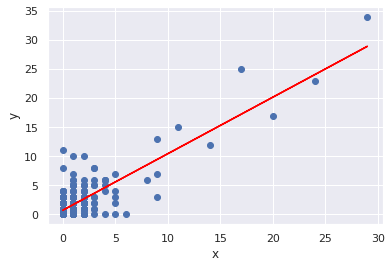

{xtth: 25.7205821695835, yt3h: 25.7205821695835}
算出允許誤差
xgboost、lasso比較
[13:49:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.7483341135444679


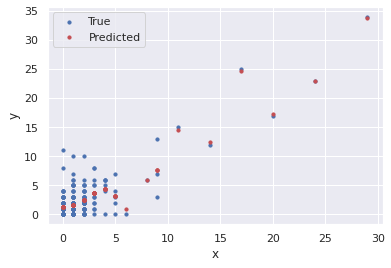

1.9999627440581194


In [ ]:
xtth= railtnho["delay"].to_numpy()
yt3h= rail33ho["delay"].to_numpy()
xtth=xtth.reshape(-1,1)
modelt3h = LinearRegression(fit_intercept=True)
modelt3h.fit(xtth, yt3h)
print("modelt3h slope:    ", modelt3h.coef_[0])
print("modelt3h intercept:", modelt3h.intercept_)
print("LinearRegression Score: ",modelt3h.score(xtth,yt3h))
predict = modelt3h.predict(xtth)
plt.plot(xtth,predict,c="red")
plt.scatter(xtth,yt3h)
plt.xlabel('x')
plt.ylabel('y')
plt.show()
k= modelt3h.coef_[0]
l= modelt3h.intercept_
x,y = symbols('xtth,yt3h')
print(solve([k*x+l-y,x-y],[x,y]))
print("算出允許誤差")
print("xgboost、lasso比較")
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(xtth,yt3h)
predicted=xgbrModel.predict(xtth)
print("xg Score: ",xgbrModel.score(xtth,yt3h))
plt.scatter(xtth, yt3h, s=10, label='True')
plt.scatter(xtth, predicted, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
v = mean_squared_error(yt3h,predicted)
print(sqrt(v))


**嘉義到斗六**

Modelcd slope:     1.0468400085308047
Modelcd intercept: 0.9372896314197543


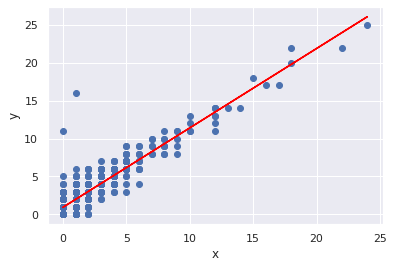

{xcd: -20.0104496309695, ycd: -20.0104496309695}
算出允許誤差
xgboost、lasso比較
[13:49:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.8171362500037948


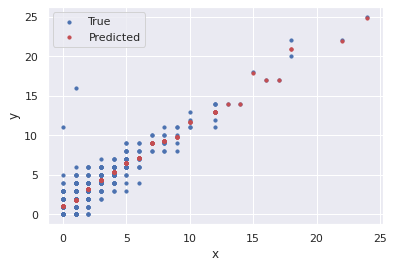

1.0980651235255863


In [ ]:
xcd= railcyk["delay"].to_numpy()
ycd= rail0k["delay"].to_numpy()
xcd=xcd.reshape(-1,1)
modelcd = LinearRegression(fit_intercept=True)
modelcd.fit(xcd, ycd)
print("Modelcd slope:    ", modelcd.coef_[0])
print("Modelcd intercept:", modelcd.intercept_)
predict = modelcd.predict(xcd)
plt.plot(xcd,predict,c="red")
plt.scatter(xcd,ycd)
plt.xlabel('x')
plt.ylabel('y')
plt.show()
k= modelcd.coef_[0]
l= modelcd.intercept_
x,y = symbols('xcd,ycd')
print(solve([k*x+l-y,x-y],[x,y]))
print("算出允許誤差")
print("xgboost、lasso比較")
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(xcd,ycd)
predicted=xgbrModel.predict(xcd)
print("xg Score: ",xgbrModel.score(xcd,ycd))
plt.scatter(xcd, ycd, s=10, label='True')
plt.scatter(xcd, predicted, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
v = mean_squared_error(ycd,predicted)
print(sqrt(v))

**嘉義到台中**

Modelcd slope:     0.9509302200486281
Modelcd intercept: 0.36448141271431345


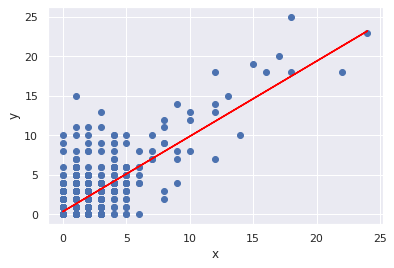

{xct: 7.42781836550954, y33: 7.42781836550954}
算出允許誤差
xgboost、lasso比較
[13:49:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.5875514300929754


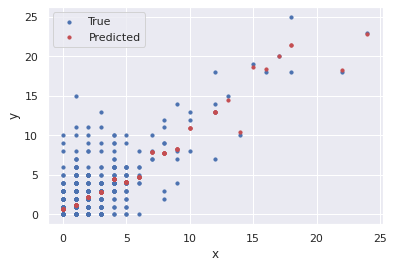

1.8035855554249942


In [ ]:
xct= railcyj["delay"].to_numpy()
y33= rail33["delay"].to_numpy()
xct=xct.reshape(-1,1)
modelcd = LinearRegression(fit_intercept=True)
modelcd.fit(xct, y33)
print("Modelcd slope:    ", modelcd.coef_[0])
print("Modelcd intercept:", modelcd.intercept_)
predict = modelcd.predict(xct)
plt.plot(xct,predict,c="red")
plt.scatter(xct,y33)
plt.xlabel('x')
plt.ylabel('y')
plt.show()
k= modelcd.coef_[0]
l= modelcd.intercept_
x,y = symbols('xct,y33')
print(solve([k*x+l-y,x-y],[x,y]))
print("算出允許誤差")
print("xgboost、lasso比較")
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(xct,y33)
predicted=xgbrModel.predict(xct)
print("xg Score: ",xgbrModel.score(xct,y33))
plt.scatter(xct, y33, s=10, label='True')
plt.scatter(xct, predicted, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
v = mean_squared_error(y33,predicted)
print(sqrt(v))

**斗六到員林**

Model0 slope:     0.9781433831445496
Model0 intercept: -0.4955599320260087


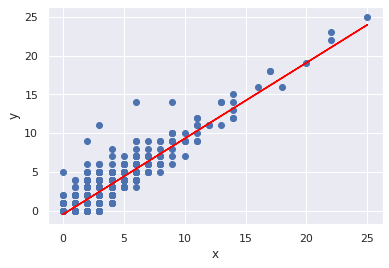

{x0: -22.6732222696414, y0: -22.6732222696414}
算出允許誤差
xgboost、lasso比較
[13:49:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.8475093252560305


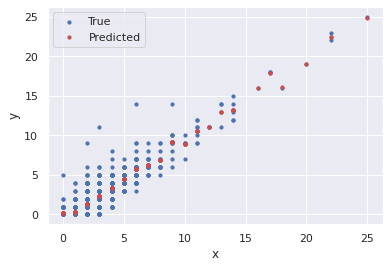

1.07455232272842


In [ ]:

x0= rail0k["delay"].to_numpy()
y0= rail1k["delay"].to_numpy()
x0= x0.reshape(-1,1)
model0 = LinearRegression(fit_intercept=True)
model0.fit(x0, y0)
print("Model0 slope:    ", model0.coef_[0])
print("Model0 intercept:", model0.intercept_)

predict = model0.predict(x0)
plt.plot(x0,predict,c="red")
plt.scatter(x0,y0)
plt.xlabel('x')
plt.ylabel('y')
plt.show()
k0= model0.coef_[0]
l0= model0.intercept_
x,y = symbols('x0,y0')
print(solve([k0*x+l0-y,x-y],[x,y]))
print("算出允許誤差")
print("xgboost、lasso比較")
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(x0,y0)
predicted0=xgbrModel.predict(x0)
print("xg Score: ",xgbrModel.score(x0,y0))
plt.scatter(x0, y0, s=10, label='True')
plt.scatter(x0, predicted0, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
v = mean_squared_error(y0,predicted0)
print(sqrt(v))

**員林到彰化**

Model1 slope:     0.9050602922167721
Model1 intercept: 0.3949011151775239


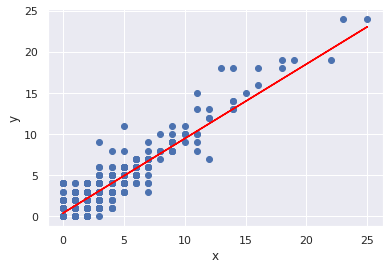

{x1: 4.15949368707965, y1: 4.15949368707965}
算出允許誤差
xgboost、lasso比較
[13:49:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.8912359883572972


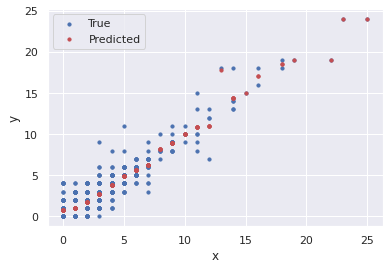

0.8817151877004807


In [ ]:
x1= rail1k["delay"].to_numpy()
y1= rail2k["delay"].to_numpy()
x1= x1.reshape(-1,1)
model1 = LinearRegression(fit_intercept=True)
model1.fit(x1, y1)
print("Model1 slope:    ", model1.coef_[0])
print("Model1 intercept:", model1.intercept_)

predict = model1.predict(x1)
plt.plot(x1,predict,c="red")
plt.scatter(x1,y1)
plt.xlabel('x')
plt.ylabel('y')
plt.show()
k1= model1.coef_[0]
l1= model1.intercept_
x,y = symbols('x1,y1')
print(solve([k1*x+l1-y,x-y],[x,y]))
print("算出允許誤差")
print("xgboost、lasso比較")
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(x1,y1)
predicted1=xgbrModel.predict(x1)
print("xg Score: ",xgbrModel.score(x1,y1))
plt.scatter(x1, y1, s=10, label='True')
plt.scatter(x1, predicted1, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
v = mean_squared_error(y1,predicted1)
print(sqrt(v))

**彰化到台中**

Model2 slope:     0.951457121660182
Model2 intercept: -0.33942697734926197


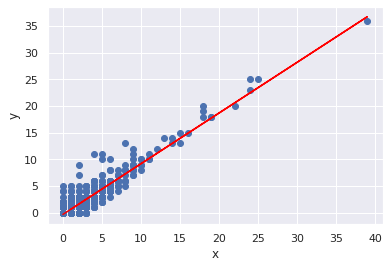

{x2: -6.99231254836494, y2: -6.99231254836494}
算出允許誤差
xgboost、lasso比較
[13:49:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.8775769474462122


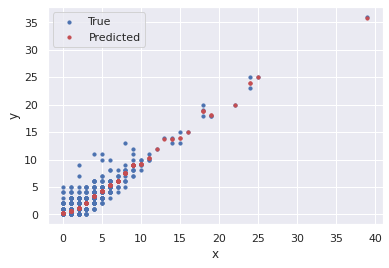

1.0414838502261252


In [ ]:
x2= rail22["delay"].to_numpy()
y2= rail3["delay"].to_numpy()
x2= x2.reshape(-1,1)
model2 = LinearRegression(fit_intercept=True)
model2.fit(x2, y2)
print("Model2 slope:    ", model2.coef_[0])
print("Model2 intercept:", model2.intercept_)

predict = model2.predict(x2)
plt.plot(x2,predict,c="red")
plt.scatter(x2,y2)
plt.xlabel('x')
plt.ylabel('y')
plt.show()
k2= model2.coef_[0]
l2= model2.intercept_
x,y = symbols('x2,y2')
print(solve([k2*x+l2-y,x-y],[x,y]))
print("算出允許誤差")
print("xgboost、lasso比較")
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(x2,y2)
predicted2=xgbrModel.predict(x2)
print("xg Score: ",xgbrModel.score(x2,y2))
plt.scatter(x2, y2, s=10, label='True')
plt.scatter(x2, predicted2, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
v = mean_squared_error(y2,predicted2)
print(sqrt(v))


**台中到豐原**

Model3 slope:     0.937068631989113
Model3 intercept: 0.1662828097197957


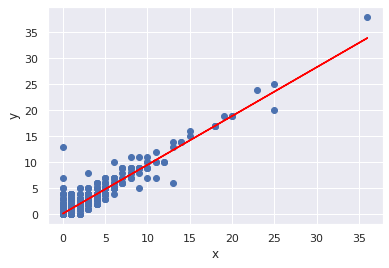

{x3: 2.64228817798827, y3: 2.64228817798827}
算出允許誤差
xgboost、lasso比較
[13:49:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.888739605643418


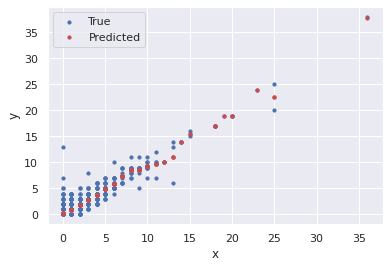

0.9916794105196794


In [ ]:

x3= rail3["delay"].to_numpy()
y3= rail4["delay"].to_numpy()
x3= x3.reshape(-1,1)
model3 = LinearRegression(fit_intercept=True)
model3.fit(x3, y3)
print("Model3 slope:    ", model3.coef_[0])
print("Model3 intercept:", model3.intercept_)

predict = model3.predict(x3)
plt.plot(x3,predict,c="red")
plt.scatter(x3,y3)
plt.xlabel('x')
plt.ylabel('y')
plt.show()
k3= model3.coef_[0]
l3= model3.intercept_
x,y = symbols('x3,y3')
print(solve([k3*x+l3-y,x-y],[x,y]))
print("算出允許誤差")
print("xgboost、lasso比較")
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(x3,y3)
predicted3=xgbrModel.predict(x3)
print("xg Score: ",xgbrModel.score(x3,y3))
plt.scatter(x3, y3, s=10, label='True')
plt.scatter(x3, predicted3, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
v = mean_squared_error(y3,predicted3)
print(sqrt(v))

**台中到苗栗**

Model35 slope:     0.8294342539279538
Model35 intercept: 0.19531241856738046


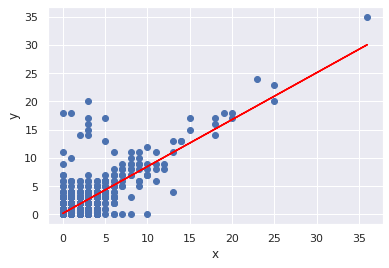

{x35: 1.14508582798847, y35: 1.14508582798847}
算出允許誤差
xgboost、lasso比較
[13:49:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.6402111170207374


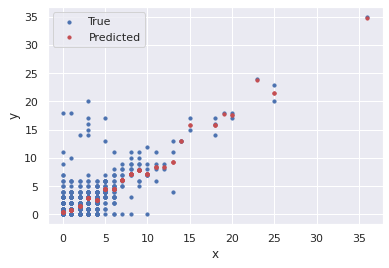

1.8867532332988777


In [ ]:

rail3g = rail3.drop([235661,235747,235919,236003,236088,236173])
x35= rail3g["delay"].to_numpy()
y35= rail5["delay"].to_numpy()
x35= x35.reshape(-1,1)
model35 = LinearRegression(fit_intercept=True)
model35.fit(x35, y35)
print("Model35 slope:    ", model35.coef_[0])
print("Model35 intercept:", model35.intercept_)

predict = model35.predict(x35)
plt.plot(x35,predict,c="red")
plt.scatter(x35,y35)
plt.xlabel('x')
plt.ylabel('y')
plt.show()
k3= model35.coef_[0]
l3= model35.intercept_
x,y = symbols('x35,y35')
print(solve([k3*x+l3-y,x-y],[x,y]))
print("算出允許誤差")
print("xgboost、lasso比較")
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(x35,y35)
predicted3=xgbrModel.predict(x35)
print("xg Score: ",xgbrModel.score(x35,y35))
plt.scatter(x35, y35, s=10, label='True')
plt.scatter(x35, predicted3, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
v = mean_squared_error(y35,predicted3)
print(sqrt(v))

**pass 調區間自強不調**

In [ ]:
railkhho = railhok[railhok["Station"]=='Kaohsiung']
railtnhok = railhok[railhok["Station"]=='Tainan']
railtnho = railho[railho["Station"]=='Tainan']
railcyho = railho[railho["Station"]=='Chiayi']
rail33ho = railho[railho["Station"]=='Taichung']
rail33hot = railhot[railhot["Station"]=='Taichung']
rail72hot = railhot[railhot["Station"]=='Hsinchu']
rail72hon = railhon[railhon["Station"]=='Hsinchu']
rail99hon = railhon[railhon["Station"]=='Banqiao']

rail3 = rail[rail["Station"]=='Taichung']
rail4 = rail[rail["Station"]=='Fengyuan']
rail4m = railm[railm["Station"]=='Fengyuan']
rail4p = rail4.drop([300927,300999,301141,301211,301281,301351])
rail5 = rail[rail["Station"]=='Miaoli']
rail55 = railm[railm["Station"]=='Miaoli']
rail66 = railm[railm["Station"]=='Zhunan']
rail6 = railz[railz["Station"]=='Zhunan']
rail77 = railz[railz["Station"]=='Hsinchu']
rail7 = railn[railn["Station"]=='Hsinchu']
rail72 = rail[rail["Station"]=='Hsinchu']
rail81 = railn[railn["Station"]=='Zhongli']
rail8 = railn[railn["Station"]=='Taoyuan']
rail88 = rail8.drop([176288,176681])
rail9 = railn[railn["Station"]=='Banqiao']

**台中到新竹**

Model42 slope:     0.7977484230670914
Model42 intercept: 0.46818781627373407


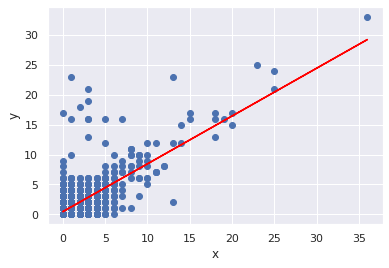

{x42: 2.31487844680213, y42: 2.31487844680213}
算出允許誤差
xgboost、lasso比較
[13:49:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.5650510916499318


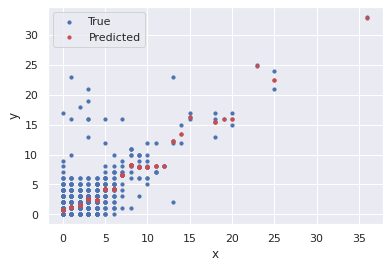

2.1363151127677424


In [ ]:
x42= rail3["delay"].to_numpy()
y42= rail72["delay"].to_numpy()
x42= x42.reshape(-1,1)
model42 = LinearRegression(fit_intercept=True)
model42.fit(x42, y42)
print("Model42 slope:    ", model42.coef_[0])
print("Model42 intercept:", model42.intercept_)

predict = model42.predict(x42)
plt.plot(x42,predict,c="red")
plt.scatter(x42,y42)
plt.xlabel('x')
plt.ylabel('y')
plt.show()
k42= model42.coef_[0]
l42= model42.intercept_
x,y = symbols('x42,y42')
print(solve([k42*x+l42-y,x-y],[x,y]))
print("算出允許誤差")
print("xgboost、lasso比較")
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(x42,y42)
predicted42=xgbrModel.predict(x42)
print("xg Score: ",xgbrModel.score(x42,y42))
plt.scatter(x42, y42, s=10, label='True')
plt.scatter(x42, predicted42, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
v = mean_squared_error(y42,predicted42)
print(sqrt(v))

**台中新竹連假**

model37h slope:     0.9210053184187339
model37h intercept: 0.17625399102821238
LinearRegression Score:  0.7452199382678649


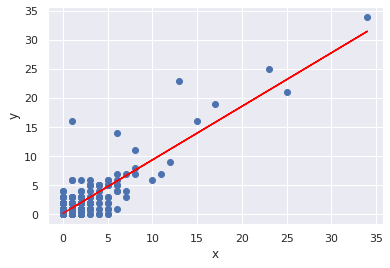

{x33h: 2.23121338677579, y72h: 2.23121338677579}
算出允許誤差
xgboost、lasso比較
[13:49:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.8169840110262833


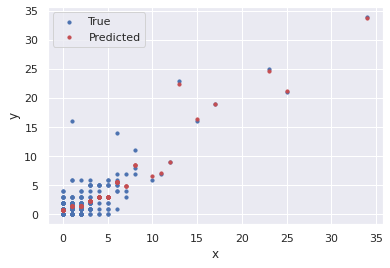

1.7491335756871695


In [ ]:
x33h= rail33hot["delay"].to_numpy()
y72h= rail72hot["delay"].to_numpy()
x33h=x33h.reshape(-1,1)
model37h = LinearRegression(fit_intercept=True)
model37h.fit(x33h, y72h)
print("model37h slope:    ", model37h.coef_[0])
print("model37h intercept:", model37h.intercept_)
print("LinearRegression Score: ",model37h.score(x33h,y72h))
predict = model37h.predict(x33h)
plt.plot(x33h,predict,c="red")
plt.scatter(x33h,y72h)
plt.xlabel('x')
plt.ylabel('y')
plt.show()
k= model37h.coef_[0]
l= model37h.intercept_
x,y = symbols('x33h,y72h')
print(solve([k*x+l-y,x-y],[x,y]))
print("算出允許誤差")
print("xgboost、lasso比較")
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(x33h,y72h)
predicted=xgbrModel.predict(x33h)
print("xg Score: ",xgbrModel.score(x33h,y72h))
plt.scatter(x33h, y72h, s=10, label='True')
plt.scatter(x33h, predicted, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
v = mean_squared_error(y72h,predicted)
print(sqrt(v))


**豐原到苗栗**

Model4 slope:     0.8804174733288929
Model4 intercept: 0.055498730580542555


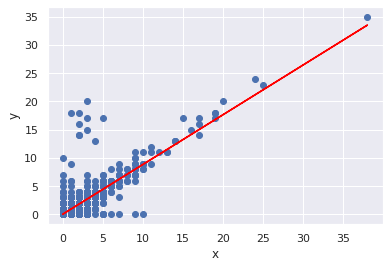

{x4: 0.464104013566992, y4: 0.464104013566992}
算出允許誤差
xgboost、lasso比較
[13:49:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.7033098524318968


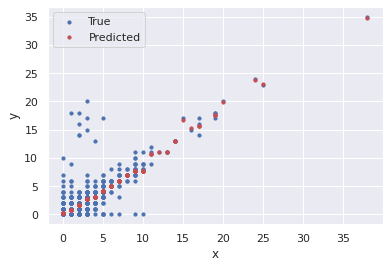

1.7133370057903101


In [ ]:
x4= rail4p["delay"].to_numpy()
y4= rail5["delay"].to_numpy()
x4= x4.reshape(-1,1)
model4 = LinearRegression(fit_intercept=True)
model4.fit(x4, y4)
print("Model4 slope:    ", model4.coef_[0])
print("Model4 intercept:", model4.intercept_)

predict = model4.predict(x4)
plt.plot(x4,predict,c="red")
plt.scatter(x4,y4)
plt.xlabel('x')
plt.ylabel('y')
plt.show()
k4= model4.coef_[0]
l4= model4.intercept_
x,y = symbols('x4,y4')
print(solve([k4*x+l4-y,x-y],[x,y]))
print("算出允許誤差")
print("xgboost、lasso比較")
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(x4,y4)
predicted4=xgbrModel.predict(x4)
print("xg Score: ",xgbrModel.score(x4,y4))
plt.scatter(x4, y4, s=10, label='True')
plt.scatter(x4, predicted4, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
v = mean_squared_error(y4,predicted4)
print(sqrt(v))

**苗栗到竹南**

Model5 slope:     0.9769478211930046
Model5 intercept: 0.23808390083371123


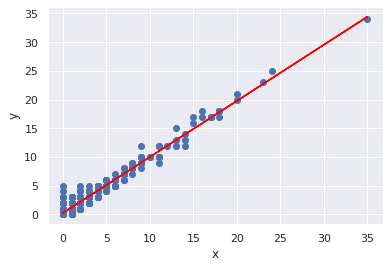

{x5: 10.3280432980793, y5: 10.3280432980793}
算出允許誤差
xgboost、lasso比較
[13:49:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.9597237198038723


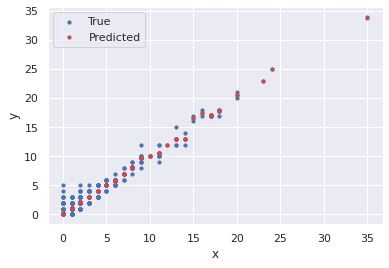

0.65394067596042


In [ ]:

x5= rail55["delay"].to_numpy()
y5= rail66["delay"].to_numpy()
x5= x5.reshape(-1,1)
model5 = LinearRegression(fit_intercept=True)
model5.fit(x5, y5)
print("Model5 slope:    ", model5.coef_[0])
print("Model5 intercept:", model5.intercept_)

predict = model5.predict(x5)
plt.plot(x5,predict,c="red")
plt.scatter(x5,y5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()
k5= model5.coef_[0]
l5= model5.intercept_
x,y = symbols('x5,y5')
print(solve([k5*x+l5-y,x-y],[x,y]))
print("算出允許誤差")
print("xgboost、lasso比較")
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(x5,y5)
predicted5=xgbrModel.predict(x5)
print("xg Score: ",xgbrModel.score(x5,y5))
plt.scatter(x5, y5, s=10, label='True')
plt.scatter(x5, predicted5, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
v = mean_squared_error(y5,predicted5)
print(sqrt(v))

**竹南到新竹**

Model6 slope:     0.9791170305252884
Model6 intercept: 0.004229586185289014


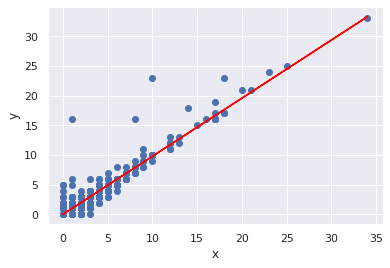

{x6: 0.202537584054355, y6: 0.202537584054355}
算出允許誤差
xgboost、lasso比較
[13:49:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.9076486423805078


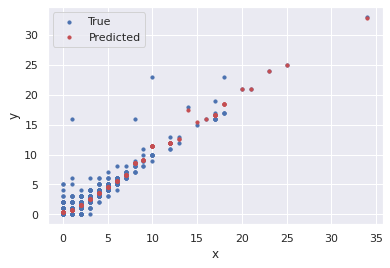

1.0252520931074376


In [ ]:
x6= rail6["delay"].to_numpy()
y6= rail77["delay"].to_numpy()
x6= x6.reshape(-1,1)
model6 = LinearRegression(fit_intercept=True)
model6.fit(x6, y6)
print("Model6 slope:    ", model6.coef_[0])
print("Model6 intercept:", model6.intercept_)

predict = model6.predict(x6)
plt.plot(x6,predict,c="red")
plt.scatter(x6,y6)
plt.xlabel('x')
plt.ylabel('y')
plt.show()
k6= model6.coef_[0]
l6= model6.intercept_
x,y = symbols('x6,y6')
print(solve([k6*x+l6-y,x-y],[x,y]))
print("算出允許誤差")
print("xgboost、lasso比較")
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(x6,y6)
predicted6=xgbrModel.predict(x6)
print("xg Score: ",xgbrModel.score(x6,y6))
plt.scatter(x6, y6, s=10, label='True')
plt.scatter(x6, predicted6, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
v = mean_squared_error(y6,predicted6)
print(sqrt(v))

**豐原到竹南**

Model46 slope:     0.8933547859780083
Model46 intercept: 0.3316431002094218


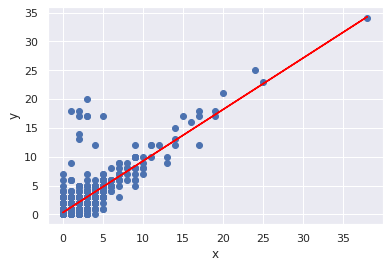

{x46: 3.10977949878774, y46: 3.10977949878774}
算出允許誤差
xgboost、lasso比較
[13:49:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.6990311317830877


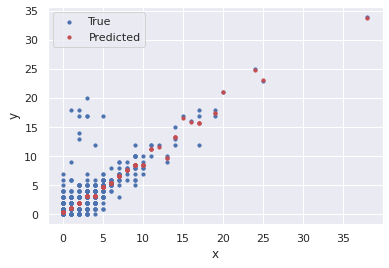

1.7876169448346577


In [ ]:

x46= rail4m["delay"].to_numpy()
y46= rail66["delay"].to_numpy()
x46= x46.reshape(-1,1)
model46 = LinearRegression(fit_intercept=True)
model46.fit(x46, y46)
print("Model46 slope:    ", model46.coef_[0])
print("Model46 intercept:", model46.intercept_)

predict = model46.predict(x46)
plt.plot(x46,predict,c="red")
plt.scatter(x46,y46)
plt.xlabel('x')
plt.ylabel('y')
plt.show()
k46= model46.coef_[0]
l46= model46.intercept_
x,y = symbols('x46,y46')
print(solve([k46*x+l46-y,x-y],[x,y]))
print("算出允許誤差")
print("xgboost、lasso比較")
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(x46,y46)
predicted46=xgbrModel.predict(x46)
print("xg Score: ",xgbrModel.score(x46,y46))
plt.scatter(x46, y46, s=10, label='True')
plt.scatter(x46, predicted46, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
v = mean_squared_error(y46,predicted46)
print(sqrt(v))

**新竹到中壢**

Model7 slope:     0.9464843169416229
Model7 intercept: 0.5283153680859287


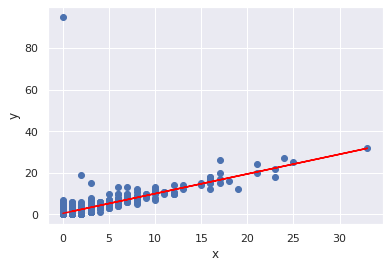

{x7: 9.87215967157930, y7: 9.87215967157930}
算出允許誤差
3/5中壢死傷事故https://www.ptt.cc/bbs/Railway/M.1614910195.A.09E.html


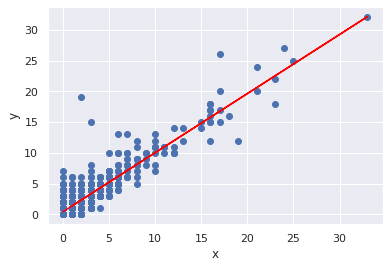

{x7k: 10.6507967683194, y7k: 10.6507967683194}
算出允許誤差
xgboost、lasso比較
[13:49:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.8425323415344792


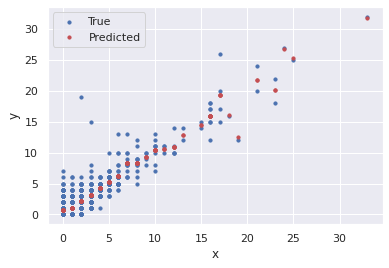

1.357211094430086


In [ ]:

x7= rail7["delay"].to_numpy()
y7= rail81["delay"].to_numpy()
x7= x7.reshape(-1,1)
model7 = LinearRegression(fit_intercept=True)
model7.fit(x7, y7)
print("Model7 slope:    ", model7.coef_[0])
print("Model7 intercept:", model7.intercept_)

predict = model7.predict(x7)
plt.plot(x7,predict,c="red")
plt.scatter(x7,y7)
plt.xlabel('x')
plt.ylabel('y')
plt.show()
k7= model7.coef_[0]
l7= model7.intercept_
x,y = symbols('x7,y7')
print(solve([k7*x+l7-y,x-y],[x,y]))
print("算出允許誤差")

print("3/5中壢死傷事故https://www.ptt.cc/bbs/Railway/M.1614910195.A.09E.html")
ff = rail7.drop([139626])
kk = rail81.drop([11483])
ff1 = rail8.drop([180232])
kk1 = rail9.drop([163298])
x7k= ff["delay"].to_numpy()
y7k= kk["delay"].to_numpy()
x7k= x7k.reshape(-1,1)
model7k = LinearRegression(fit_intercept=True)
model7k.fit(x7k, y7k)
predictt = model7k.predict(x7k)
plt.plot(x7k,predictt,c="red")
plt.scatter(x7k,y7k)
plt.xlabel('x')
plt.ylabel('y')
plt.show()
k7k= model7k.coef_[0]
l7k= model7k.intercept_
x,y = symbols('x7k,y7k')
print(solve([k7k*x+l7k-y,x-y],[x,y]))
print("算出允許誤差")
print("xgboost、lasso比較")
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(x7k,y7k)
predicted7k=xgbrModel.predict(x7k)
print("xg Score: ",xgbrModel.score(x7k,y7k))
plt.scatter(x7k, y7k, s=10, label='True')
plt.scatter(x7k, predicted7k, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
v = mean_squared_error(y7k,predicted7k)
print(sqrt(v))


**新竹到板橋**

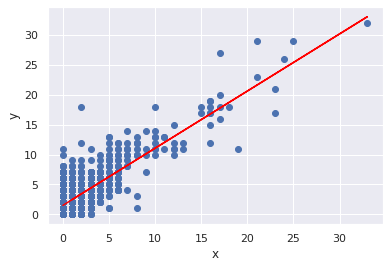

{x79: 32.8790557923575, y79: 32.8790557923575}
算出允許誤差
xgboost、lasso比較
[13:49:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.6969352819736495


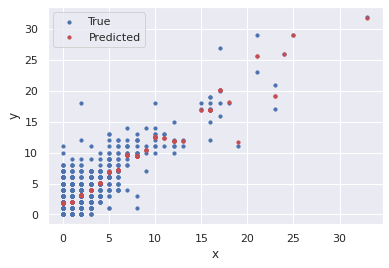

2.0637989098186784


In [ ]:
ff = rail7.drop([139626,133751,134335])
kk1 = rail9.drop([163298])

x79= ff["delay"].to_numpy()
y79= kk1["delay"].to_numpy()
x79= x79.reshape(-1,1)
model79 = LinearRegression(fit_intercept=True)
model79.fit(x79, y79)
predictt = model79.predict(x79)
plt.plot(x79,predictt,c="red")
plt.scatter(x79,y79)
plt.xlabel('x')
plt.ylabel('y')
plt.show()
k7k= model79.coef_[0]
l7k= model79.intercept_
x,y = symbols('x79,y79')
print(solve([k7k*x+l7k-y,x-y],[x,y]))
print("算出允許誤差")
print("xgboost、lasso比較")
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(x79,y79)
predicted7k=xgbrModel.predict(x79)
print("xg Score: ",xgbrModel.score(x79,y79))
plt.scatter(x79, y79, s=10, label='True')
plt.scatter(x79, predicted7k, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
v = mean_squared_error(y79,predicted7k)
print(sqrt(v))


**新竹板橋連假**

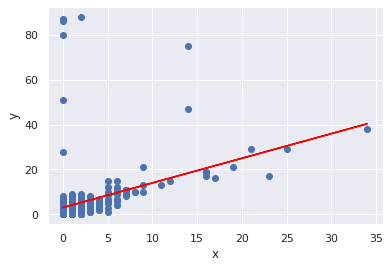

{x79ho: -31.6507302342350, y79ho: -31.6507302342350}
算出允許誤差
xgboost、lasso比較
[13:53:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.25576938828506923


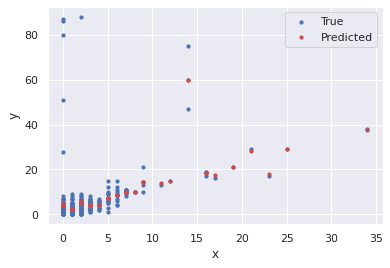

10.199174082393132
        Station  direction   id        date   time  num     dest  delay type
143923  Hsinchu          1  101  2021/04/03  18:32  134  Keelung   34.0    B
        Station  direction   id        date   time  num     dest  delay type
167771  Banqiao          1   26  2021/04/03  08:07  102     Qidu   51.0    B
167786  Banqiao          1   41  2021/04/03  09:46  170  Hualien   88.0    B
167793  Banqiao          1   48  2021/04/03  10:28  182  Hualien   86.0    B
167796  Banqiao          1   51  2021/04/03  10:51  108     Qidu   80.0    B
167805  Banqiao          1   60  2021/04/03  11:52  112  Keelung   47.0    B
167871  Banqiao          1  126  2021/04/03  19:33  134  Keelung   38.0    B
167742  Banqiao          1  159  2021/04/02  23:06  150     Qidu   87.0    B
167745  Banqiao          1  162  2021/04/02  23:52  152     Qidu   75.0    B


In [ ]:

x79ho= rail72hon["delay"].to_numpy()
y79ho= rail99hon["delay"].to_numpy()
x79ho= x79ho.reshape(-1,1)
model79ho = LinearRegression(fit_intercept=True)
model79ho.fit(x79ho, y79ho)
predict = model79ho.predict(x79ho)
plt.plot(x79ho,predict,c="red")
plt.scatter(x79ho,y79ho)
plt.xlabel('x')
plt.ylabel('y')
plt.show()
k7k= model79ho.coef_[0]
l7k= model79ho.intercept_
x,y = symbols('x79ho,y79ho')
print(solve([k7k*x+l7k-y,x-y],[x,y]))
print("算出允許誤差")
print("xgboost、lasso比較")
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(x79ho,y79ho)
predicted7ho=xgbrModel.predict(x79ho)
print("xg Score: ",xgbrModel.score(x79ho,y79ho))
plt.scatter(x79ho, y79ho, s=10, label='True')
plt.scatter(x79ho, predicted7ho, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
v = mean_squared_error(y79ho,predicted7ho)
print(sqrt(v))
print(rail72hon[rail72hon["delay"]>30])
print(rail99hon[rail99hon["delay"]>30])

**中壢到桃園**

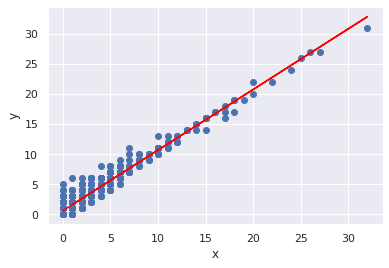

{x8k: -91.9696915987036, y8k: -91.9696915987036}
算出允許誤差
xgboost、lasso比較
[13:49:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.9475527443804572


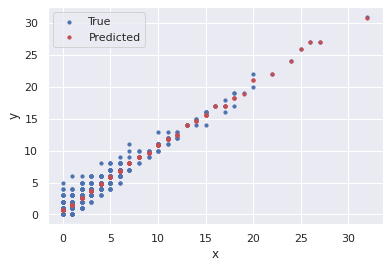

0.8106505954967448


In [ ]:
kk1 = rail81.drop([11483])
ff1 = rail8.drop([180232])

x8k= kk1["delay"].to_numpy()
y8k= ff1["delay"].to_numpy()
x8k= x8k.reshape(-1,1)
model8k = LinearRegression(fit_intercept=True)
model8k.fit(x8k, y8k)
predictt = model8k.predict(x8k)
plt.plot(x8k,predictt,c="red")
plt.scatter(x8k,y8k)
plt.xlabel('x')
plt.ylabel('y')
plt.show()
k8k= model8k.coef_[0]
l8k= model8k.intercept_
x,y = symbols('x8k,y8k')
print(solve([k8k*x+l8k-y,x-y],[x,y]))
print("算出允許誤差")
print("xgboost、lasso比較")
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(x8k,y8k)
predicted8k=xgbrModel.predict(x8k)
print("xg Score: ",xgbrModel.score(x8k,y8k))
plt.scatter(x8k, y8k, s=10, label='True')
plt.scatter(x8k, predicted8k, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
v = mean_squared_error(y8k,predicted8k)
print(sqrt(v))


**桃園到板橋**

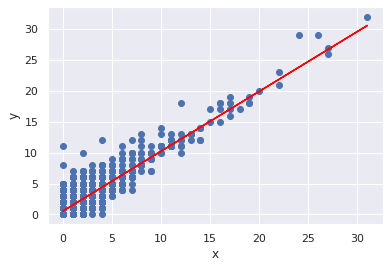

{x9k: 17.4957460373289, y9k: 17.4957460373289}
算出允許誤差
xgboost、lasso比較
[13:49:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.8340011905435876


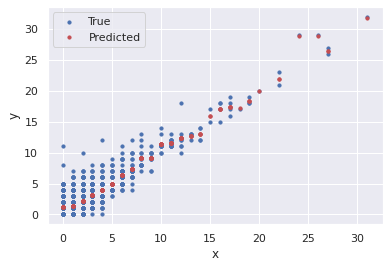

1.5273978515668787


In [ ]:

ff1 = rail88.drop([180232])
kk1 = rail9.drop([163298])

y9k= kk1["delay"].to_numpy()
x9k= ff1["delay"].to_numpy()
x9k= x9k.reshape(-1,1)
model9k = LinearRegression(fit_intercept=True)
model9k.fit(x9k, y9k)
predictt = model9k.predict(x9k)
plt.plot(x9k,predictt,c="red")
plt.scatter(x9k,y9k)
plt.xlabel('x')
plt.ylabel('y')
plt.show()
k9k= model9k.coef_[0]
l9k= model9k.intercept_
x,y = symbols('x9k,y9k')
print(solve([k9k*x+l9k-y,x-y],[x,y]))
print("算出允許誤差")
print("xgboost、lasso比較")
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(x9k,y9k)
predicted9k=xgbrModel.predict(x9k)
print("xg Score: ",xgbrModel.score(x9k,y9k))
plt.scatter(x9k, y9k, s=10, label='True')
plt.scatter(x9k, predicted9k, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
v = mean_squared_error(y9k,predicted9k)
print(sqrt(v))

